# First Objective:
* ## The problem that we want to treat is predicting the price of used cars. The goal is to develop a model that can accurately predict the price of a used car based on various features such as make, model, age, mileage, and other relevant factors. 
* ## I have thoroughly studied the factors that significantly impact the price of a used car. According to sources such as [First](https://www.investopedia.com/articles/investing/090314/just-what-factors-value-your-used-car.asp), [Second](https://www.moneycrashers.com/factors-affect-used-cars-resale-value/), [Third](https://www.truebil.com/blog/7-factors-that-influence-the-price-of-a-used-car), the most influential factors include the make and model of the vehicle, the mileage, and the year of production. However, other factors such as the color, number of doors, and drive wheels may also influence the value to some extent.
## State of the Art: 
* ### This is a regression problem and there are various existing methods for predicting the price of used cars, including linear regression, decision trees, and random forests. Linear regression models the relationship between the dependent variable (car price) and one or more independent variables (car features), however the model's usually way too simple to capture complex relationships. That's where the tree-like models come in. Decision trees and Random Forests are more complex methods that use a tree-like model to make predictions based on the features of the data.
* ### Source: Here's a simple Study ["Predicting the Price of Used Cars using Machine Learning Techniques"](http://ripublication.com/irph/ijict_spl/ijictv4n7spl_17.pdf) that uses the techniques I just described.



# Second Objective

* ### Now I'm gonna collect and clean the data and start exploring the features.
* ### The dataset I use comes from an old competition on [machinehack](https://machinehack.com/hackathons/data_hack_mathcothon_car_price_prediction_challenge/data). I chose this dataset because it offers more data and better features than others I could find.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [3]:
df = pd.read_csv("car_data.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df['ID'].value_counts()

45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
           ..
45774312    1
45732621    1
45773011    1
45774019    1
45813273    1
Name: ID, Length: 18924, dtype: int64

### Since the ID is not unique and does not appear to be a useful feature for our analysis, we can remove it from the dataset.

In [6]:
df = df.drop('ID', axis=1)

In [7]:
df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


* ### There seem to be some values missing from the dataset, though it's filled with '-' instead of NAN values.
* ### I'm gonna replace them with NAN values, so it's easier to work with.

In [8]:
df = df.replace('-', np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

### Looks like the only column filled with '-' was Levy. This might mean that there are no other columns with missing values, or that they are filled with other values. We're gonna find out as we proceed.

### ~30% of the values for the Levy feature are missing, and it does not appear to be a particularly useful feature for our analysis. So, we can drop it.

In [10]:
df = df.drop('Levy', axis=1)

## EDA

### Now let's start by exploring some of the features

* ### Price Distribution

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # this suppresses scientific formatting
df['Price'].describe()

count      19237.000
mean       18555.927
std       190581.270
min            1.000
25%         5331.000
50%        13172.000
75%        22075.000
max     26307500.000
Name: Price, dtype: float64

<Figure size 1400x1000 with 0 Axes>

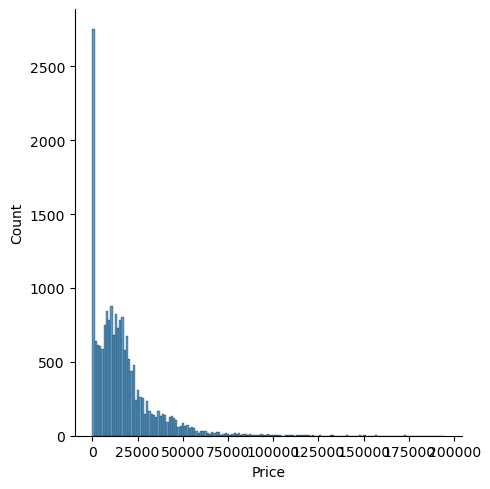

In [12]:
plt.figure(figsize=(14, 10))
sns.displot(df[df['Price'] <= 200000]['Price'])
plt.show()

In [13]:
df[df['Price'] < 500]

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
27,30,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000 km,4.000,Automatic,Front,04-May,Left wheel,White,8
33,125,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,287274 km,6.000,Automatic,4x4,04-May,Left wheel,White,12
39,314,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746 km,6.000,Automatic,4x4,04-May,Left wheel,Silver,12
45,220,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,4,239342 km,6.000,Automatic,4x4,04-May,Left wheel,Silver,12
53,392,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1600 km,4.000,Automatic,Rear,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635 km,4.000,Automatic,Front,04-May,Left wheel,Black,12
19218,30,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0 km,4.000,Automatic,Front,04-May,Right-hand drive,Green,9
19229,50,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.000,Automatic,Front,04-May,Left wheel,Silver,6
19230,470,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.000,Automatic,Front,04-May,Left wheel,Silver,12


In [14]:
len(df[df['Price'] > 200000])

13

### Removing the outliers:
* ### There are only 13 cars above 200000 price point, we can remove them.
* ### The cars that are below 500 seem to be outliers too. There are many newer cars with low Mileages listed at that price point, which is very unlikely.

In [15]:
df = df[df['Price'] <= 200000]
df = df[df['Price'] > 500]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Category          17559 non-null  object 
 5   Leather interior  17559 non-null  object 
 6   Fuel type         17559 non-null  object 
 7   Engine volume     17559 non-null  object 
 8   Mileage           17559 non-null  object 
 9   Cylinders         17559 non-null  float64
 10  Gear box type     17559 non-null  object 
 11  Drive wheels      17559 non-null  object 
 12  Doors             17559 non-null  object 
 13  Wheel             17559 non-null  object 
 14  Color             17559 non-null  object 
 15  Airbags           17559 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

In [18]:
df['Prod. year'].value_counts()[:10]

2014    1961
2012    1932
2013    1777
2015    1439
2016    1411
2011    1395
2010    1330
2017     833
2008     636
2009     563
Name: Prod. year, dtype: int64

## As expected, the average price for year is steadily increasing. There seem to be some outliers, so I'm gonna check them by hand. It's possible that older cars are considered antique and therefore have a higher value.

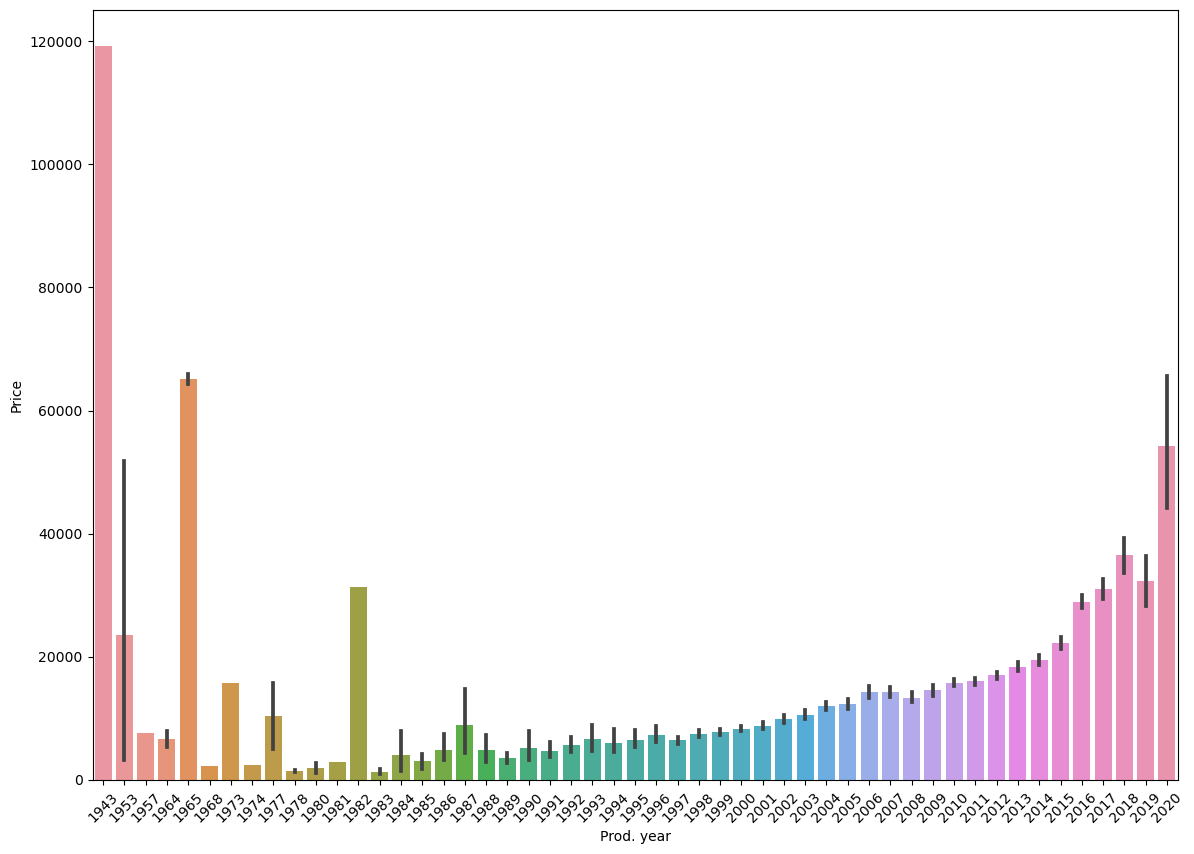

In [19]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='Prod. year', y='Price')
plt.xticks(rotation=45)
plt.show()

## Sure enough, these cars are very prestigue. So I'm just gonna leave them as is.

In [20]:
df[df['Prod. year'] == 1943]

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
6607,119172,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000 km,4.000,Automatic,Rear,04-May,Left wheel,White,0


In [21]:
df[df['Prod. year'] == 1965]

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7667,65858,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800 km,8.000,Automatic,Front,02-Mar,Left wheel,Red,2
13973,64290,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7 Turbo,1142 km,8.000,Automatic,Rear,02-Mar,Left wheel,Red,12


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Category          17559 non-null  object 
 5   Leather interior  17559 non-null  object 
 6   Fuel type         17559 non-null  object 
 7   Engine volume     17559 non-null  object 
 8   Mileage           17559 non-null  object 
 9   Cylinders         17559 non-null  float64
 10  Gear box type     17559 non-null  object 
 11  Drive wheels      17559 non-null  object 
 12  Doors             17559 non-null  object 
 13  Wheel             17559 non-null  object 
 14  Color             17559 non-null  object 
 15  Airbags           17559 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

In [23]:
df['Category'].value_counts()

Sedan          7998
Jeep           4925
Hatchback      2531
Minivan         624
Coupe           507
Universal       363
Microbus        295
Goods wagon     229
Pickup           47
Cabriolet        34
Limousine         6
Name: Category, dtype: int64

## Check how category affects the Price.

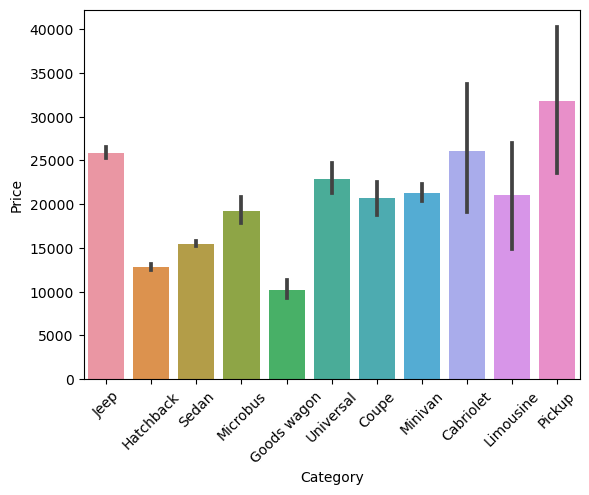

In [24]:
sns.barplot(data=df, x='Category', y='Price')
plt.xticks(rotation=45)
plt.show()

## The price is highly dependent on the type of category. To use this information in a model, we need to convert the fuel type from a categorical variable to a numeric one.
* ### We can use the [to_dummies]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)) method in pandas to create dummy variables. This will add 11 new features to our DataFrame, but this should not pose a problem for the models we plan to train.

In [25]:
# Get one hot encoded values
one_hot = pd.get_dummies(df['Category'])
# Drop the initial column
df = df.drop('Category', axis = 1)
# Add one hot values to DataFrame.
df = df.join(one_hot)

## Let's check how Leather interior feature affects the price
* ### We can compare their distributions and their average prices

In [26]:
df['Leather interior'].value_counts()

Yes    12530
No      5029
Name: Leather interior, dtype: int64

<Figure size 1000x1400 with 0 Axes>

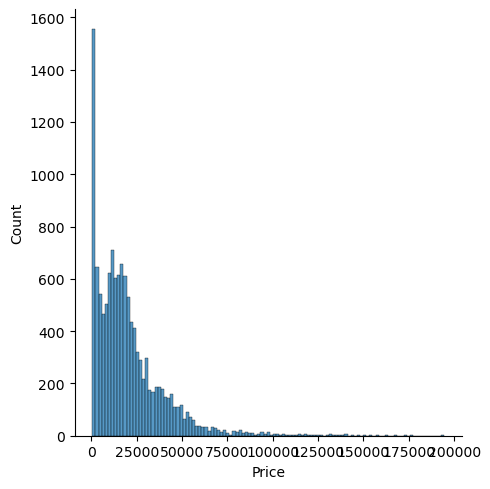

In [27]:
plt.figure(figsize=(10, 14))
sns.displot(df[df['Leather interior'] == 'Yes']['Price'])
plt.show()

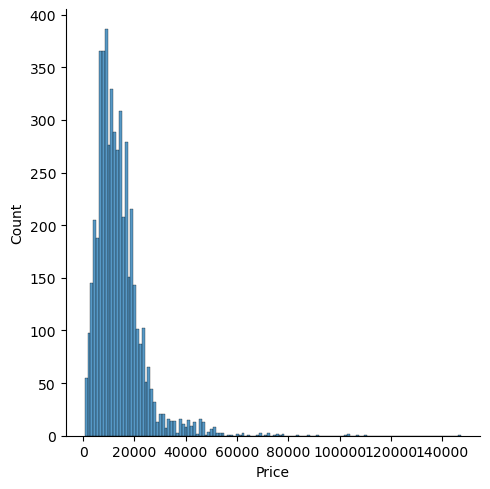

In [28]:
sns.displot(df[df['Leather interior'] == 'No']['Price'])
plt.show()

In [29]:
average_price_with_leather = df[df['Leather interior'] == 'Yes']['Price'].mean()
average_price_without_leather = df[df['Leather interior'] == 'No']['Price'].mean()

print("Average Price for with leather:", average_price_with_leather)
print("Average Price for without leather:", average_price_without_leather)

Average Price for with leather: 20401.407342378294
Average Price for without leather: 14012.986677271823


* ### It seems that cars with leather interior have a higher price and their distributions are different too.
* ### In order to use this feature for our model, we need to transform it from categorical to numeric.
* ### We can just replace "Yes" with 1 and "No" with 0.

In [30]:
df['Leather interior'] = df['Leather interior'].map({"Yes": 1, "No": 0})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Leather interior  17559 non-null  int64  
 5   Fuel type         17559 non-null  object 
 6   Engine volume     17559 non-null  object 
 7   Mileage           17559 non-null  object 
 8   Cylinders         17559 non-null  float64
 9   Gear box type     17559 non-null  object 
 10  Drive wheels      17559 non-null  object 
 11  Doors             17559 non-null  object 
 12  Wheel             17559 non-null  object 
 13  Color             17559 non-null  object 
 14  Airbags           17559 non-null  int64  
 15  Cabriolet         17559 non-null  uint8  
 16  Coupe             17559 non-null  uint8 

In [32]:
df['Fuel type'].value_counts()

Petrol            9307
Diesel            3846
Hybrid            2959
LPG                874
CNG                486
Plug-in Hybrid      86
Hydrogen             1
Name: Fuel type, dtype: int64

## Let's check how fuel type affects the Price
* ### We can use barplot to plot average prices for each type of fuel.

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

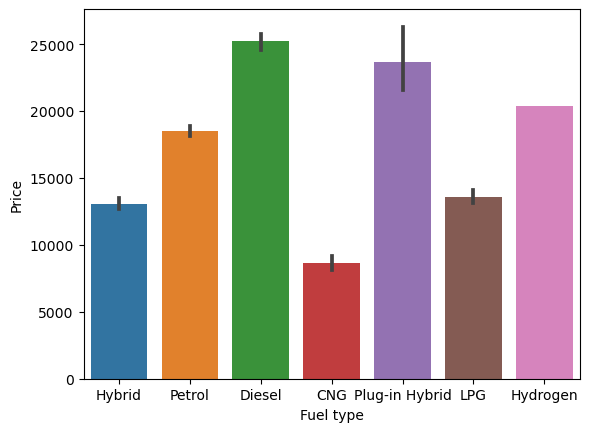

In [33]:
sns.barplot(data=df, x='Fuel type', y='Price')

## It appears the price of a car is significantly influenced by the type of fuel. To include this information into our model, we will need to transform the fuel type variable into a numeric representation.

In [34]:
# Get one hot encoded values
one_hot = pd.get_dummies(df['Fuel type'])
# Drop the initial column
df = df.drop('Fuel type', axis = 1)
# Add one hot values to DataFrame.
df = df.join(one_hot)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Leather interior  17559 non-null  int64  
 5   Engine volume     17559 non-null  object 
 6   Mileage           17559 non-null  object 
 7   Cylinders         17559 non-null  float64
 8   Gear box type     17559 non-null  object 
 9   Drive wheels      17559 non-null  object 
 10  Doors             17559 non-null  object 
 11  Wheel             17559 non-null  object 
 12  Color             17559 non-null  object 
 13  Airbags           17559 non-null  int64  
 14  Cabriolet         17559 non-null  uint8  
 15  Coupe             17559 non-null  uint8  
 16  Goods wagon       17559 non-null  uint8 

In [36]:
df['Engine volume'].value_counts()

2            3706
2.5          2051
1.8          1569
1.6          1413
1.5          1203
             ... 
6.7             1
7.3             1
3.7 Turbo       1
6.8             1
1.1 Turbo       1
Name: Engine volume, Length: 106, dtype: int64

## Transform Engine Volume from categorical to numeric.
* ### Engine Volume is a string object and we need to extract integer values from it. We can use the .extract() method.

In [37]:
df['Engine volume'] = df['Engine volume'].str.extract('(\d+)')
df['Engine volume'] = pd.to_numeric(df['Engine volume'])

In [38]:
df['Engine volume'].value_counts()

2     8010
1     5971
3     2605
4      685
5      189
0       74
6       22
20       2
7        1
Name: Engine volume, dtype: int64

In [39]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19231    107800 km
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
Name: Mileage, Length: 17559, dtype: object

## Transform Mileage from categorical to numeric
* ### We can use the extract() method in a similar manner as above.

In [40]:
df['Mileage'] = df['Mileage'].str.extract('(\d+)')
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Leather interior  17559 non-null  int64  
 5   Engine volume     17559 non-null  int64  
 6   Mileage           17559 non-null  int64  
 7   Cylinders         17559 non-null  float64
 8   Gear box type     17559 non-null  object 
 9   Drive wheels      17559 non-null  object 
 10  Doors             17559 non-null  object 
 11  Wheel             17559 non-null  object 
 12  Color             17559 non-null  object 
 13  Airbags           17559 non-null  int64  
 14  Cabriolet         17559 non-null  uint8  
 15  Coupe             17559 non-null  uint8  
 16  Goods wagon       17559 non-null  uint8 

In [42]:
df['Gear box type'].value_counts()

Automatic    11990
Tiptronic     3021
Manual        1836
Variator       712
Name: Gear box type, dtype: int64

## Transform Gear Box Type from Categorical to Numeric.
* ### We can handle this the same way we handled Fuel type feature.

In [43]:
# Get one hot encoded values
one_hot = pd.get_dummies(df['Gear box type'])
# Drop the initial column
df = df.drop('Gear box type', axis = 1)
# Add one hot values to DataFrame.
df = df.join(one_hot)

In [44]:
df

,Price,Manufacturer,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Drive wheels,Doors,...,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid,Automatic,Manual,Tiptronic,Variator
0,13328,LEXUS,RX 450,2010,1,3,186005,6.000,4x4,04-May,...,0,1,0,0,0,0,1,0,0,0
1,16621,CHEVROLET,Equinox,2011,0,3,192000,6.000,4x4,04-May,...,0,0,0,0,1,0,0,0,1,0
2,8467,HONDA,FIT,2006,0,1,200000,4.000,Front,04-May,...,0,0,0,0,1,0,0,0,0,1
3,3607,FORD,Escape,2011,1,2,168966,4.000,4x4,04-May,...,0,1,0,0,0,0,1,0,0,0
4,11726,HONDA,FIT,2014,1,1,91901,4.000,Front,04-May,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,MERCEDES-BENZ,E 350,2013,1,3,107800,6.000,Rear,04-May,...,1,0,0,0,0,0,1,0,0,0
19232,8467,MERCEDES-BENZ,CLK 200,1999,1,2,300000,4.000,Rear,02-Mar,...,0,0,0,0,0,0,0,1,0,0
19233,15681,HYUNDAI,Sonata,2011,1,2,161600,4.000,Front,04-May,...,0,0,0,0,1,0,0,0,1,0
19234,26108,HYUNDAI,Tucson,2010,1,2,116365,4.000,Front,04-May,...,1,0,0,0,0,0,1,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Leather interior  17559 non-null  int64  
 5   Engine volume     17559 non-null  int64  
 6   Mileage           17559 non-null  int64  
 7   Cylinders         17559 non-null  float64
 8   Drive wheels      17559 non-null  object 
 9   Doors             17559 non-null  object 
 10  Wheel             17559 non-null  object 
 11  Color             17559 non-null  object 
 12  Airbags           17559 non-null  int64  
 13  Cabriolet         17559 non-null  uint8  
 14  Coupe             17559 non-null  uint8  
 15  Goods wagon       17559 non-null  uint8  
 16  Hatchback         17559 non-null  uint8 

In [46]:
df['Drive wheels'].value_counts()

Front    11928
4x4       3497
Rear      2134
Name: Drive wheels, dtype: int64

## Although there is not as much difference in the Drive wheels category, it still appears to be significant enough to justify including it in the model.

<AxesSubplot:xlabel='Drive wheels', ylabel='Price'>

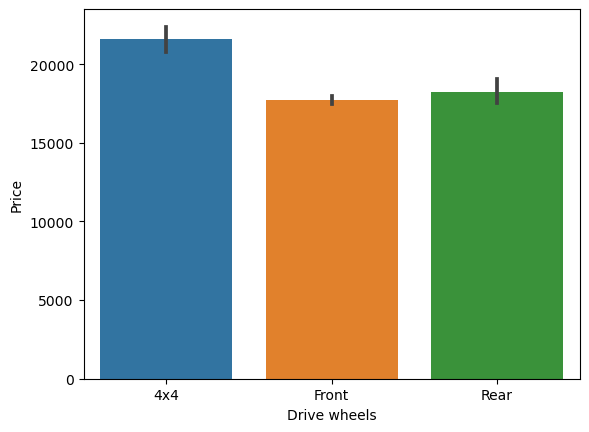

In [47]:
sns.barplot(data=df, x='Drive wheels', y='Price')

In [48]:
# Get one hot encoded values
one_hot = pd.get_dummies(df['Drive wheels'])
# Drop the initial column
df = df.drop('Drive wheels', axis = 1)
# Add one hot values to DataFrame.
df = df.join(one_hot)

In [49]:
df['Doors'].value_counts()

04-May    16686
02-Mar      754
>5          119
Name: Doors, dtype: int64

## Transform Doors into numeric values.
* ### We can use the same approach for doors as we used with dealing with Mileages.
* ### Extract integer informations and transform data

In [50]:
df['Doors'] = df['Doors'].str.extract('(\d+)')
df['Doors'] = pd.to_numeric(df['Doors'])

In [51]:
df['Doors'].value_counts()

4    16686
2      754
5      119
Name: Doors, dtype: int64

In [52]:
df['Wheel'].value_counts()

Left wheel          16218
Right-hand drive     1341
Name: Wheel, dtype: int64

# Transform wheels into numeric values.
* ### We can use the same approach for wheels as we used with dealing with Leather interior.
* ### We can transform "Left Wheel" as 1 and "Right-hand drive" to 0.

In [53]:
df['Wheel'] = df['Wheel'].map({"Left wheel": 1, "Right-hand drive": 0})

In [54]:
df['Wheel']

0        1
1        1
2        0
3        1
4        1
        ..
19231    1
19232    1
19233    1
19234    1
19235    1
Name: Wheel, Length: 17559, dtype: int64

In [55]:
df['Color'].value_counts()

Black            4544
White            4046
Silver           3496
Grey             2144
Blue             1291
Red               597
Green             301
Orange            251
Carnelian red     171
Brown             164
Golden            142
Beige             128
Sky blue          116
Yellow            106
Purple             37
Pink               25
Name: Color, dtype: int64

## Color is another feature that might be relevant to the pricing of the car.
* ### If we don't want to lose any information, we have to one hot encode this feature too. This means we'll be adding 16 new columns to the DataFrame.

In [56]:
# Get one hot encoded values
one_hot = pd.get_dummies(df['Color'])
# Drop the initial column
df = df.drop('Color', axis = 1)
# Add one hot values to DataFrame.
df = df.join(one_hot)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17559 entries, 0 to 19235
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17559 non-null  int64  
 1   Manufacturer      17559 non-null  object 
 2   Model             17559 non-null  object 
 3   Prod. year        17559 non-null  int64  
 4   Leather interior  17559 non-null  int64  
 5   Engine volume     17559 non-null  int64  
 6   Mileage           17559 non-null  int64  
 7   Cylinders         17559 non-null  float64
 8   Doors             17559 non-null  int64  
 9   Wheel             17559 non-null  int64  
 10  Airbags           17559 non-null  int64  
 11  Cabriolet         17559 non-null  uint8  
 12  Coupe             17559 non-null  uint8  
 13  Goods wagon       17559 non-null  uint8  
 14  Hatchback         17559 non-null  uint8  
 15  Jeep              17559 non-null  uint8  
 16  Limousine         17559 non-null  uint8 

# Creating Regression Models
* ## Now that all of our variables are in numeric values, we can start training our model.
* ## Let's first split the data into train and test sets using sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [58]:
X = df.drop(['Manufacturer', 'Model', 'Price'], axis=1)
y = df['Price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train

,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Wheel,Airbags,Cabriolet,Coupe,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
17502,2017,1,1,64416,4.000,4,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
6483,1999,0,1,225000,4.000,4,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7718,2016,1,3,81000,6.000,4,1,12,0,0,...,0,1,0,0,0,0,0,0,0,0
104,2004,0,2,300000,4.000,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
12013,2008,0,3,128487,8.000,4,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12365,2008,0,0,166000,4.000,2,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
13112,2014,1,1,78836,4.000,4,1,4,0,0,...,0,0,0,0,0,0,1,0,0,0
5911,1992,0,2,111111,4.000,4,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
933,2010,1,3,179554,6.000,4,1,6,0,0,...,0,1,0,0,0,0,0,0,0,0


* ## First, we're gonna go for a simple, Linear Regression model and see how it performs.

In [61]:
linear_model = LinearRegression()

In [62]:
linear_model.fit(X_train, y_train)

LinearRegression()

## Setting squared=False returns RMSE instead of MSE, see the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html)

* ### Performance on the Train Set:

In [63]:
y_pred_train = linear_model.predict(X_train)
RMSE = mean_squared_error(y_train, y_pred_train, squared=False)
print("(Train Set) RMSE For a Linear Regression:", RMSE)

(Train Set) RMSE For a Linear Regression: 14664.445331686169


* ### Performance on the Test Set:

In [64]:
y_pred_test = linear_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE For a Linear Regression:", RMSE)

RMSE For a Linear Regression: 14179.136080031034


In [65]:
y_pred = linear_model.predict(X_test)

## Now we will try using KNN Regression, as it was also utilized in the previously mentioned paper.

In [66]:
knn_model = KNeighborsRegressor()

In [67]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

* ### Performance on the Train Set:

In [68]:
y_pred_train = knn_model.predict(X_train)
RMSE = mean_squared_error(y_train, y_pred_train, squared=False)
print("(Train Set) RMSE For a KNN Regression:", RMSE)

(Train Set) RMSE For a KNN Regression: 13036.565102812543


* ### Performance on the Test Set:

In [69]:
y_pred_test = knn_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE For a KNN Regression:", RMSE)

RMSE For a KNN Regression: 15997.664188221004


## Now we're gonna train a RandomForest, which is a collection of decision trees. I believe that this model should work the best, given the nature of our data.

In [70]:
forest_model = RandomForestRegressor()

In [71]:
forest_model.fit(X_train, y_train)

RandomForestRegressor()

* ### Performance on the Train Set:

In [72]:
y_pred_train = forest_model.predict(X_train)
RMSE = mean_squared_error(y_train, y_pred_train, squared=False)
print("(Train Set) RMSE For a Random Forest Regression:", RMSE)

(Train Set) RMSE For a Random Forest Regression: 3941.836359373642


* ### Performance on the Test Set:

In [73]:
y_pred_test = forest_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE For a Random Forest Regression:", RMSE)

RMSE For a Random Forest Regression: 9303.40117110199


## As anticipated, the Random Forest model achieved the best performance. While the model may be overfitted to the training set, we could potentially reduce this by adjusting the hyperparameters

## We will also test using the Gradient Boosting method. Though this method was not mentioned in the paper, it is known to be a state-of-the-art technique for regression tasks and may potentially perform well in this situation.

In [74]:
boosting_model = GradientBoostingRegressor()

In [75]:
boosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

* ### Performance on the Train Set:

In [76]:
y_pred_train = boosting_model.predict(X_train)
RMSE = mean_squared_error(y_train, y_pred_train, squared=False)
print("(Train Set) RMSE For a Gradient Boosting Regression:", RMSE)

(Train Set) RMSE For a Gradient Boosting Regression: 10824.020970233818


* ### Performance on the Test Set:

In [77]:
y_pred_test = boosting_model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE For a Gradient Boosting Regression:", RMSE)

RMSE For a Gradient Boosting Regression: 10787.27395995356


## This performs worse than Random Forests, but better than other models.

# We will now visualize the feature importances for our Random Forest model to see if it aligns with our expectations.

* ### I got the code for visualizing Random Forest Feature Importances from [here](https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python)

In [78]:
importances = forest_model.feature_importances_
indices = np.argsort(importances)
features = X.columns

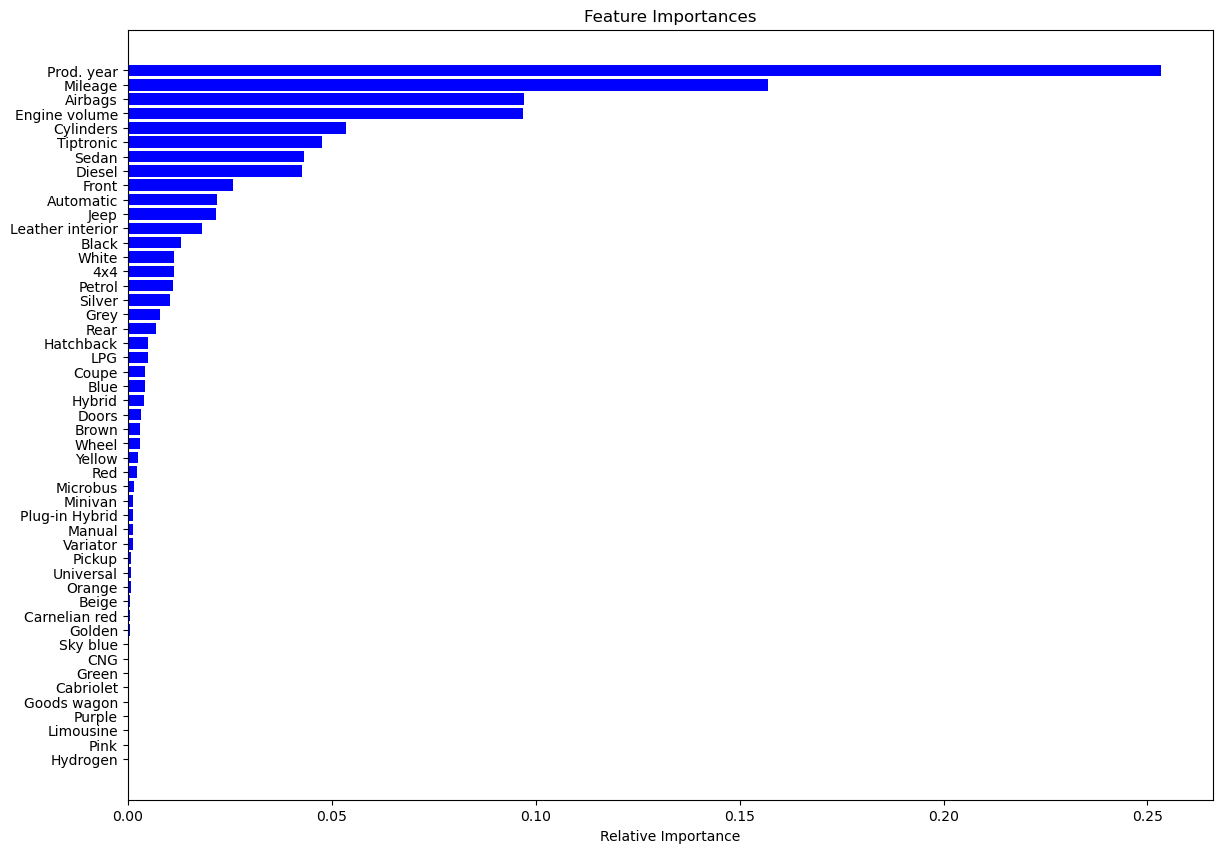

In [79]:
plt.figure(figsize=(14, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## As expected, the important features match our expectations. Production year and mileage are the top two most influential factors in predicting the price, followed by engine volume and airbags. It also appears that the color of the car is a significant factor in the price prediction

## In conclusion: the Random Forest model performed very well and identified the important features that were logical and expected. We could potentially improve the model's performance even more by fine-tuning the hyperparameters.